<h1>Predicting diamond prices using Linear Regression</h1>
<h2>Importing common libraries</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importing the diamond dataset from Kaggle</h2>

In [2]:
url = 'https://drive.google.com/file/d/1vAUS-K-c6_1I7OT8sWuTgnIE8b09FKvN/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

diamondData=pd.read_csv(path)

<h2>Perform Exploratory Data Analytics</h2>

In [3]:
diamondData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamondData.shape

(53940, 11)

<h3>Check for numeric and non-numeric attributes</h3>

In [5]:
diamondData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
diamondData = diamondData.drop(["Unnamed: 0"], axis=1)

In [7]:
diamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h3>Check for null values</h3>

In [8]:
diamondData.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h4>We observe that the minimum values for x, y and z are 0, which is not possible, hence removing the corresponding tuples</h4>

In [9]:
diamondData = diamondData.drop(diamondData[diamondData["x"]==0].index)
diamondData = diamondData.drop(diamondData[diamondData["y"]==0].index)
diamondData = diamondData.drop(diamondData[diamondData["z"]==0].index)

In [10]:
diamondData.shape

(53920, 10)

In [11]:
diamondData.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h3>Plot histogram, pairplot and heatmap</h3>

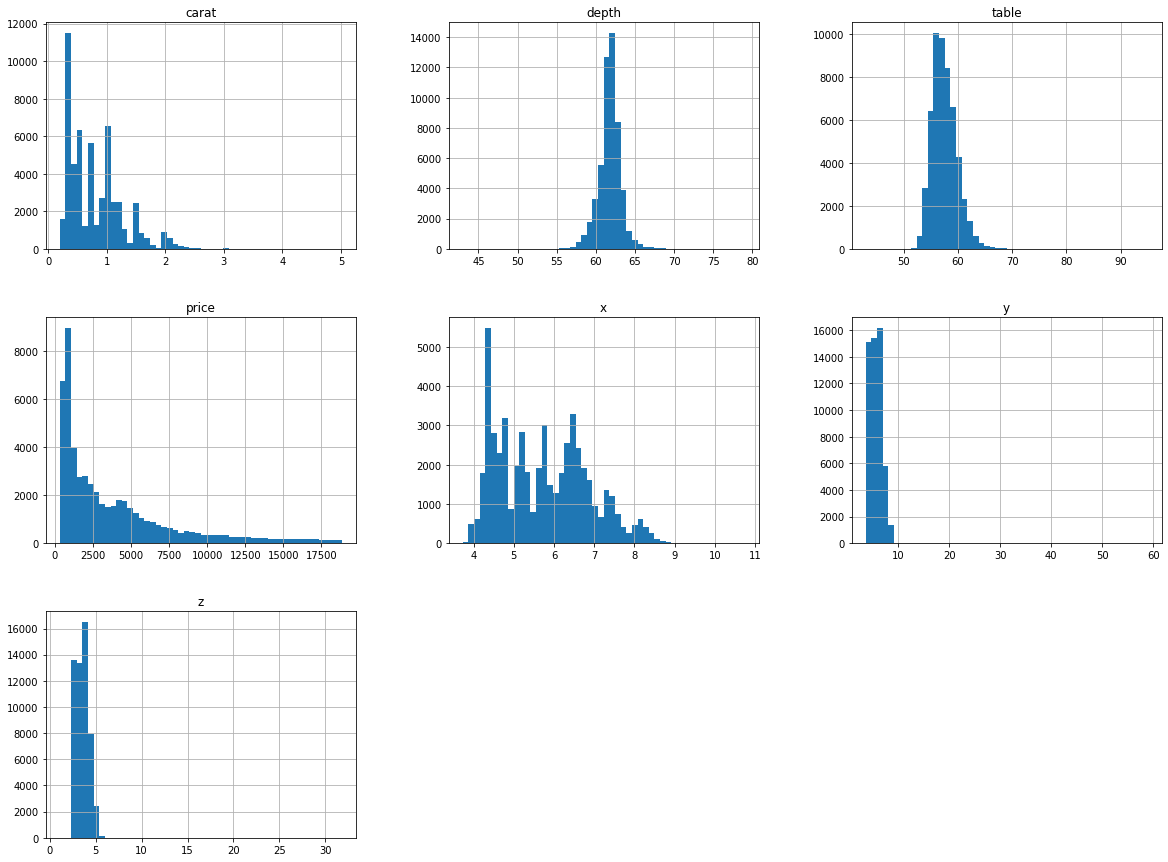

In [12]:
diamondData.hist(bins=50, figsize=(20,15))
plt.show()

<h4>We pick x,y,z within 10, discard the rest</h4>

In [13]:
diamondData = diamondData[(diamondData["x"]<15)]
diamondData = diamondData[(diamondData["y"]<15)]
diamondData = diamondData[(diamondData["z"]<15)]

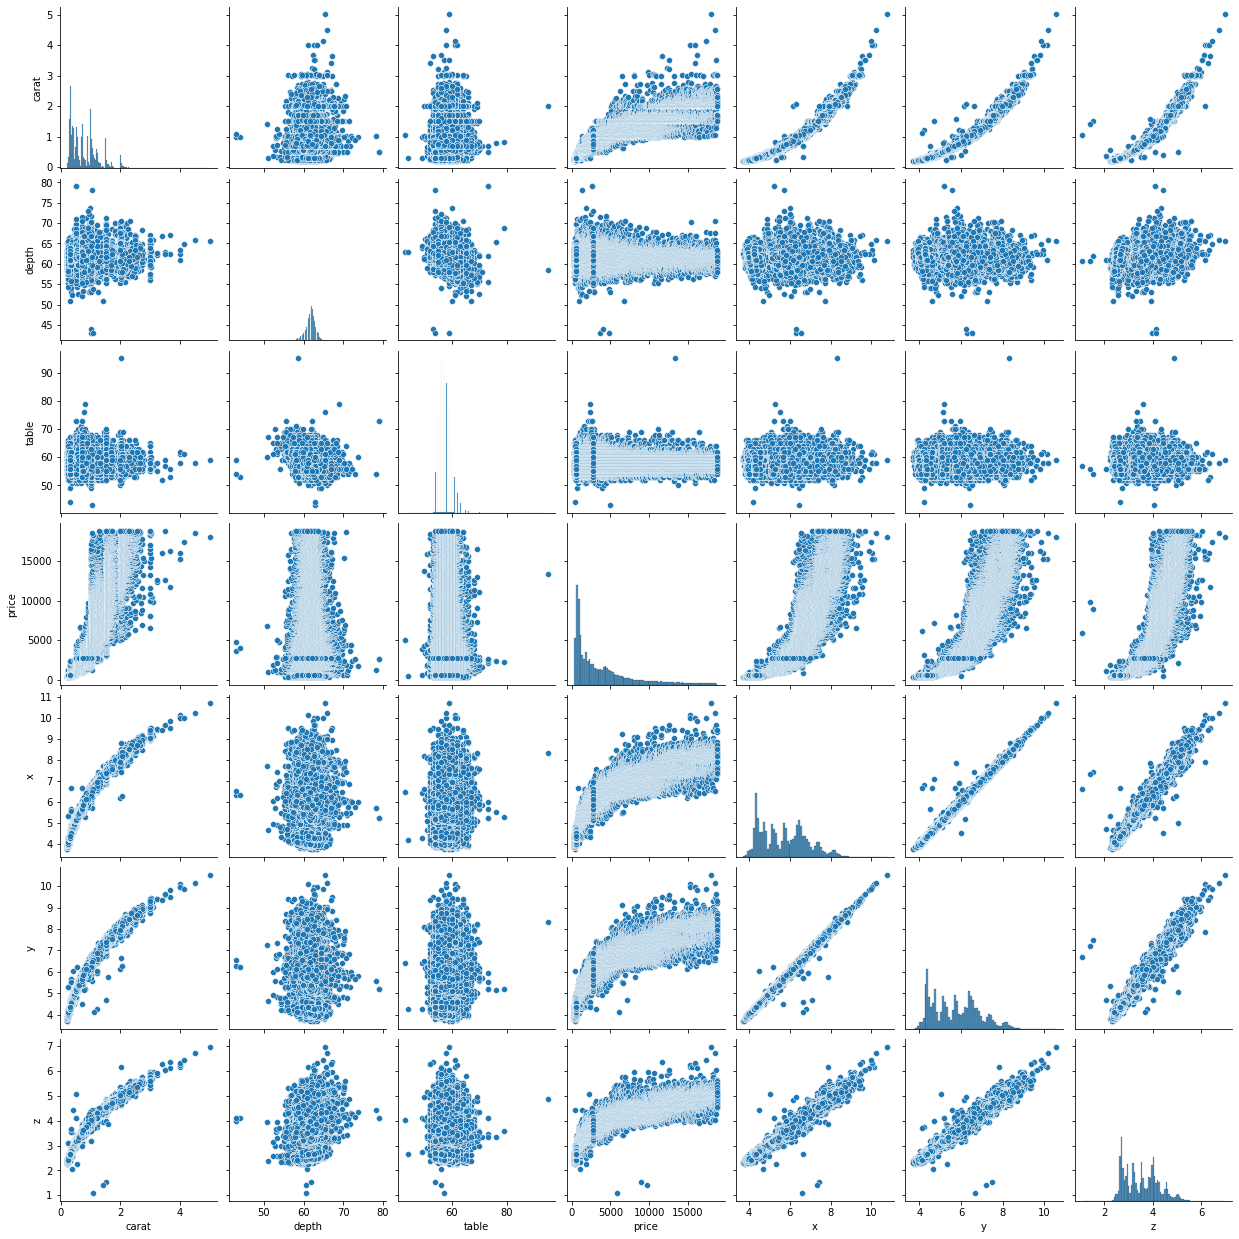

In [14]:
sns.pairplot(diamondData)

<h4>Filtering out outliers for depth and table</h4>

In [15]:
diamondData = diamondData[(diamondData["depth"]<75)&(diamondData["depth"]>45)]
diamondData = diamondData[(diamondData["table"]<80)&(diamondData["table"]>40)]

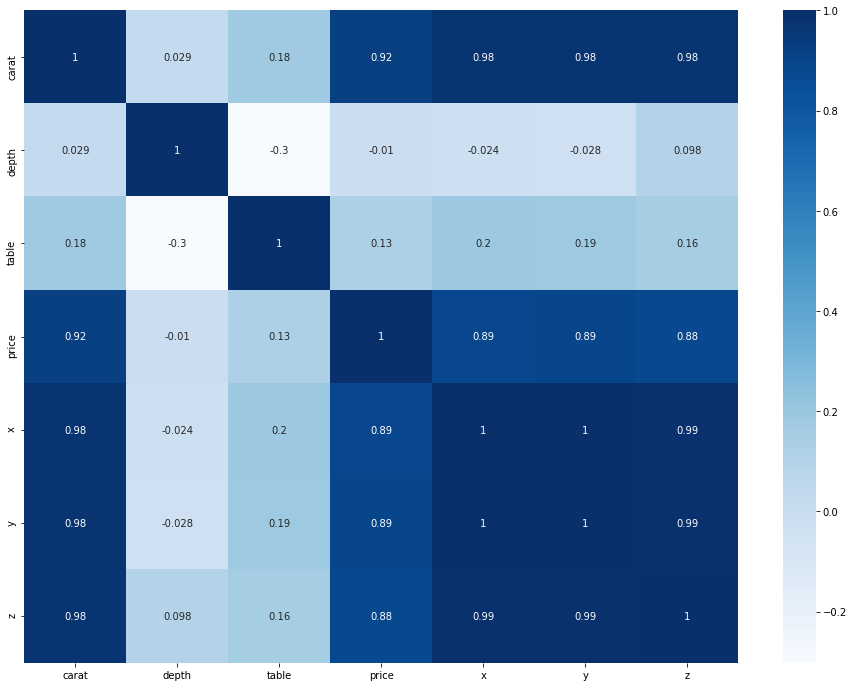

In [16]:
plt.figure(figsize= (16,12))
correlation = diamondData.corr()
sns.heatmap(correlation,annot = True, cmap="Blues")
plt.show()

<h2>Convert non-numeric attributes to numeric, using OneHotEncoder</h2>

In [17]:
catAts = (diamondData.dtypes =="object")
cat_cols = list(catAts[catAts].index)
#diamondCat = diamondData[cat_cols]
print("Categorical variables:")
print(cat_cols)

Categorical variables:
['cut', 'color', 'clarity']


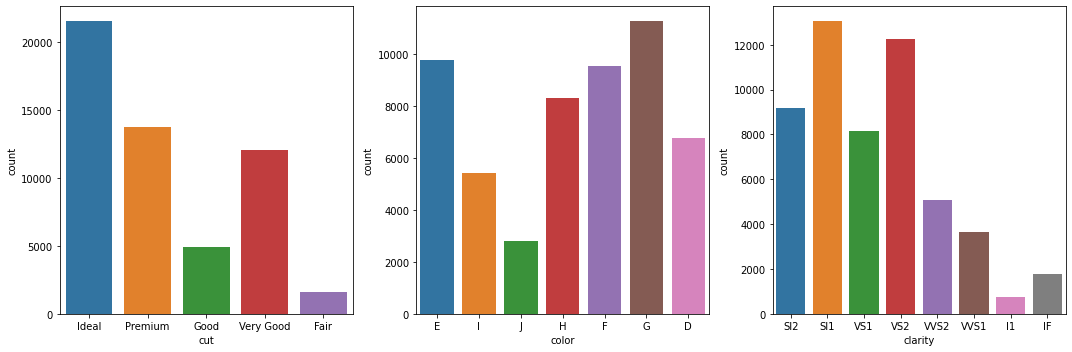

In [18]:
fig,ax = plt.subplots(1,3, figsize=(15, 5))
sns.countplot(x="cut", data=diamondData, ax=ax[0])
sns.countplot(x="color", data=diamondData, ax=ax[1])
sns.countplot(x="clarity", data=diamondData, ax=ax[2])
plt.tight_layout()

In [19]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
diamondDataCopy = encoder.fit_transform(diamondData)
diamondDataCopy.head()

     |████████████████████████████████| 81kB 3.5MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,carat,cut_Ideal,cut_Premium,cut_Good,cut_Very Good,cut_Fair,color_E,color_I,color_J,color_H,color_F,color_G,color_D,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF,depth,table,price,x,y,z
0,0.23,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,63.3,58.0,335,4.34,4.35,2.75


<h2>Identify X and Y variables and split into train and test data</h2>

In [20]:
X = diamondDataCopy.drop(["price"], axis=1)
Y = diamondDataCopy["price"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

In [22]:
X_train.shape

(43128, 26)

In [23]:
X_test.shape

(10782, 26)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

<h2>Performing 10-fold cross validation</h2>

In [25]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores_train = np.sqrt(-scores_train)
print("RMSE for train set: ", rmse_scores_train.mean())

scores_test = cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv=10)
rmse_scores_test = np.sqrt(-scores_test)
print("RMSE for test set: ", rmse_scores_test.mean())

RMSE for train set:  1128.6760351918085
RMSE for test set:  1104.417851354672


<h2>Training a Linear regression model</h2>

In [26]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Y_predict = model.predict(X_test)

<h2>Calculate the accuracy</h2>

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error = %.2f" % np.sqrt(mean_squared_error(Y_test, Y_predict)))
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 1107.13
Variance score = 0.92


<h2>Visualizing train and test results</h2>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


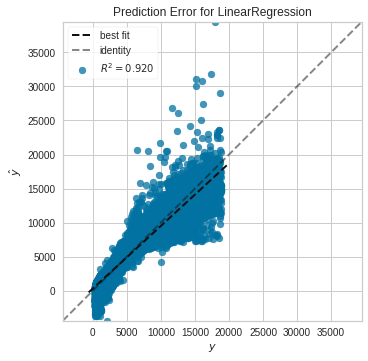

In [29]:
!pip install yellowbrick
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer_train = PredictionError(model)
visualizer_train.fit(X_train, Y_train)
visualizer_train.score(X_train, Y_train)
visualizer_train.poof()

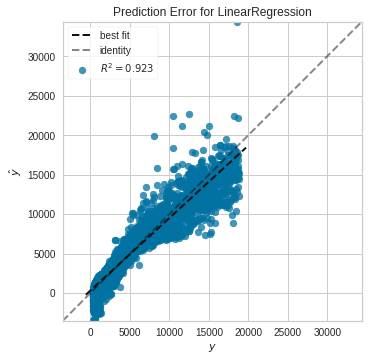

In [30]:
visualizer_test = PredictionError(model)
visualizer_test.fit(X_train, Y_train)
visualizer_test.score(X_test, Y_test)
visualizer_test.poof()

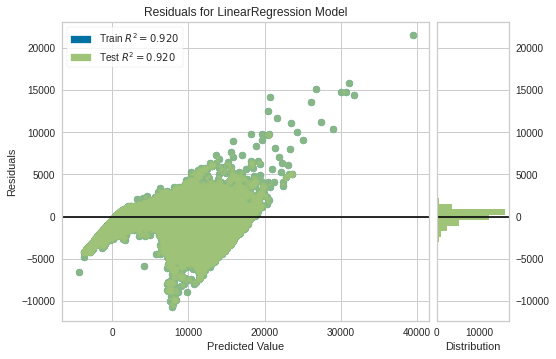

In [31]:
visualizer_train = ResidualsPlot(model)
visualizer_train.fit(X_train, Y_train)  
visualizer_train.score(X_train, Y_train)  
visualizer_train.poof()

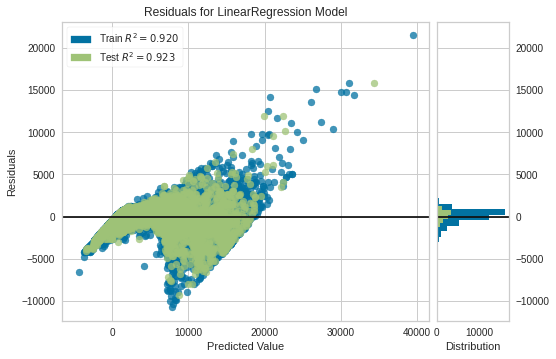

In [32]:
visualizer_test = ResidualsPlot(model)
visualizer_test.fit(X_train, Y_train)  
visualizer_test.score(X_test, Y_test)  
visualizer_test.poof()